In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/ben.meir/Downloads/iris (1).csv')

df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


X = df.drop('species', axis = 1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [11]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [12]:
y_pred = knn_model.predict(scaled_X_test)

print(f'accuracy: {accuracy_score(y_test, y_pred)}')
print()
print(f'confusion matrix: {confusion_matrix(y_test, y_pred)}')
print()
print(f'classification report matrix: {classification_report(y_test, y_pred)}')


accuracy: 0.9777777777777777

confusion matrix: [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]

classification report matrix:               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [13]:
test_error_rates = []

for k in range(1,31):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train, y_train)
    
    y_pred_test = knn_model.predict(scaled_X_test)
    test_error = 1 - accuracy_score(y_test, y_pred_test)
    test_error_rates.append(test_error)
    
test_error_rates

[0.022222222222222254,
 0.022222222222222254,
 0.0,
 0.022222222222222254,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.022222222222222254,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.022222222222222254,
 0.0444444444444444,
 0.0444444444444444,
 0.0444444444444444,
 0.06666666666666665,
 0.0888888888888889,
 0.0888888888888889]

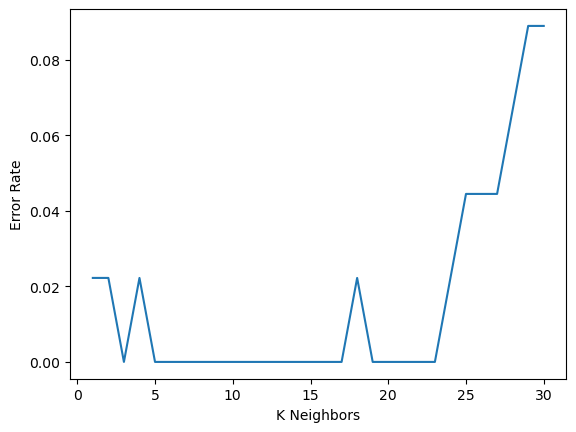

In [17]:
plt.plot(range(1,31), test_error_rates)
plt.ylabel('Error Rate')
plt.xlabel('K Neighbors')
plt.show()

In [19]:
elbow_optimal_k = 5

knn_model = KNeighborsClassifier(n_neighbors=elbow_optimal_k)
knn_model.fit(scaled_X_train, y_train)

y_pred = knn_model.predict(scaled_X_test)

print(f'accuracy: {accuracy_score(y_test, y_pred)}')
print()
print(f'confusion matrix: {confusion_matrix(y_test, y_pred)}')
print()
print(f'classification report matrix: {classification_report(y_test, y_pred)}')


accuracy: 1.0

confusion matrix: [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

classification report matrix:               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [21]:
from sklearn.model_selection import cross_val_score

cv_scores = []

for k in range(1,31):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_model, scaled_X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
    
cv_scores

[0.9238095238095239,
 0.9333333333333333,
 0.9428571428571428,
 0.9142857142857143,
 0.9238095238095239,
 0.9142857142857143,
 0.9238095238095239,
 0.9333333333333333,
 0.9142857142857143,
 0.9333333333333333,
 0.9238095238095237,
 0.9238095238095239,
 0.9142857142857143,
 0.9047619047619048,
 0.8857142857142856,
 0.9047619047619048,
 0.8857142857142856,
 0.8761904761904761,
 0.8761904761904761,
 0.8761904761904761,
 0.8761904761904761,
 0.8761904761904763,
 0.8761904761904763,
 0.8857142857142858,
 0.8857142857142858,
 0.8666666666666666,
 0.8666666666666666,
 0.8666666666666666,
 0.8666666666666666,
 0.8666666666666666]

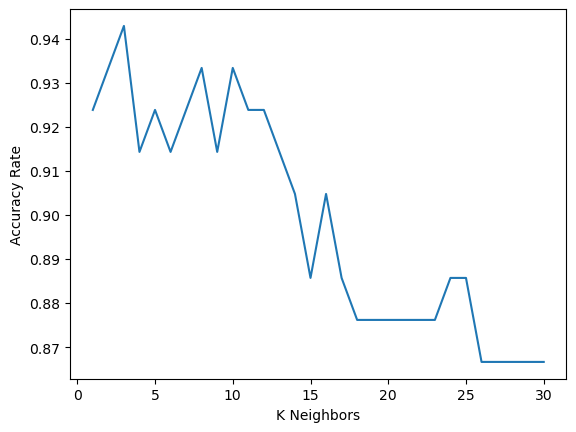

In [22]:
plt.plot(range(1,31), cv_scores)
plt.ylabel('Accuracy Rate')
plt.xlabel('K Neighbors')
plt.show()

In [23]:
cv_optimal_k = 3

knn_model = KNeighborsClassifier(n_neighbors=cv_optimal_k)
knn_model.fit(scaled_X_train, y_train)

y_pred = knn_model.predict(scaled_X_test)

print(f'accuracy: {accuracy_score(y_test, y_pred)}')
print()
print(f'confusion matrix: {confusion_matrix(y_test, y_pred)}')
print()
print(f'classification report matrix: {classification_report(y_test, y_pred)}')

accuracy: 1.0

confusion matrix: [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

classification report matrix:               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

